 Import libraries and load dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the advertising dataset
df = pd.read_csv('Advertising.csv')


In [22]:
df.shape

(200, 5)

In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Explore the dataset

In [7]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [23]:
# Calculate z-scores for each column using the zscore method
z_scores = zscore(df)
# Convert the result to a DataFrame for better visualization
z_scores_df = pd.DataFrame(z_scores, columns=df.columns)

In [24]:
threshold = 3
#Remove rows where any absolute z-score exceeds the threshold
filtered_df = df[(z_scores_df.abs() <=threshold).all(axis=1)]

Visualize the data

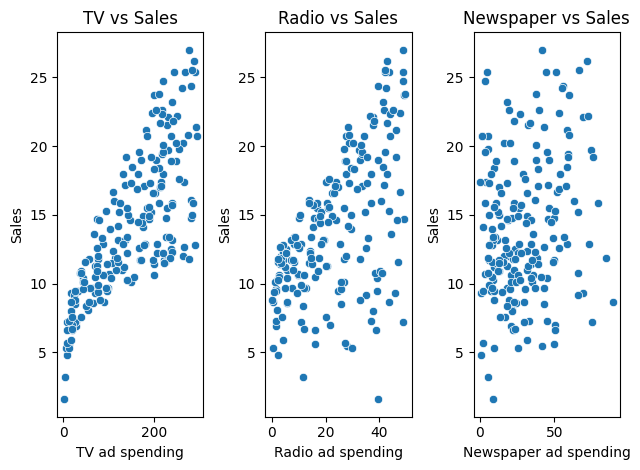

In [26]:
#creating a scatter plot to visualise how the dependent and independent variables are related
plt.subplot(1,3,1)
sns.scatterplot(x=filtered_df['TV'],y=filtered_df['Sales'])
plt.title("TV vs Sales")
plt.xlabel("TV ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,2)
sns.scatterplot(x=filtered_df['Radio'],y=filtered_df['Sales'])
plt.title("Radio vs Sales")
plt.xlabel("Radio ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,3)
sns.scatterplot(x=filtered_df['Newspaper'],y=filtered_df['Sales'])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper ad spending")
plt.ylabel("Sales")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Prepare the data for training

In [9]:
# Extract features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [10]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make predictions and evaluate the model

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


 Visualize predictions

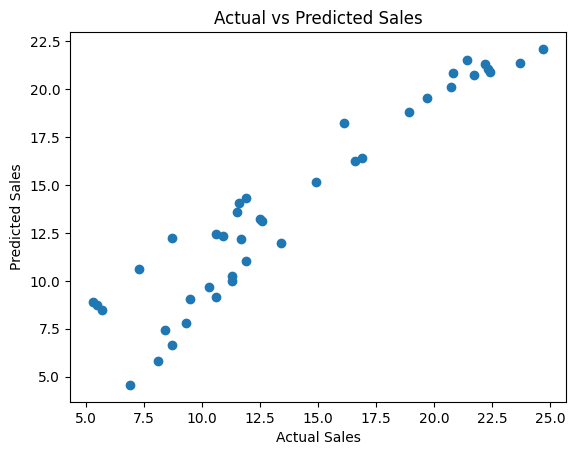

In [12]:
# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
